In [16]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


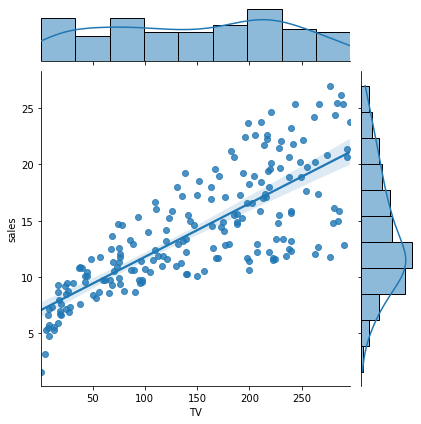

In [20]:
import seaborn as sns
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X = df[["TV"]] #bagimsiz degiskenimiz
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [27]:
y = df[["sales"]] #bagimli degiskenimiz
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [24]:
reg = LinearRegression()

In [28]:
model = reg.fit(X, y) #modeli kurmak anlamina gelir, fit demek.

In [29]:
model

LinearRegression()

In [30]:
str(model)

'LinearRegression()'

In [31]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [32]:
model.intercept_ #bu bizim b0 degerimiz.

array([7.03259355])

In [33]:
model.coef_ #bu da beta 1 katsayimiz.

array([[0.04753664]])

In [34]:
#rkare - bagimli degiskendeki degisikligin bagimsiz degiskenlerce aciklanma yuzdesidir.
model.score(X,y)

0.611875050850071

# BASIT DOGRUSAL REGRESYON TAHMIN

C:\Users\burak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


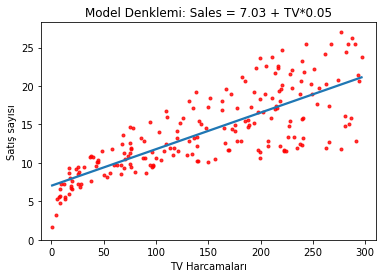

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9}) #burada ci guven araligi anlamina gelir.
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

7.03 + TV*0.05

In [40]:
7.03 + 0.05*165

15.280000000000001

In [47]:
model.predict([[165]])

array([[14.87613922]])

In [46]:
model.predict([[400]]) #predict tahmin etmede kullanilir.

array([[26.04724972]])

In [44]:
yeni_veri = [[5],[15],[30]]

In [45]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# ARTIKLAR VE MAKINE OGRENMESINDEKI ONEMI

MSE : Hata kareler ortalaması
RMSE : Hata Kareler Ortalaması'nın Karekökü

In [48]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [52]:
real_y = y[0:10]

In [53]:
tahmin_y = pd.DataFrame(model.predict(X)[0:10])

In [54]:
hatalar = pd.concat([real_y, tahmin_y], axis=1)

In [57]:
hatalar.columns = ["gercek_y", "tahmin_edilen_y"]

In [58]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [61]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [63]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [64]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [65]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [67]:
import numpy as np
np.mean(hatalar["hata_kareler"]) #hata kareler ortalamasini hesapladik. 

9.290350329638105